In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from icecream import ic
import numpy as np

In [59]:
data = pd.read_csv('../datasets/OIE_data.csv')
ic(data.columns)
data.info()

ic| data.columns: Index(['patientnumber', 'malclass', 'PTH', 'age', 'sex', 'Ethnicity', 'Groups',
                         'Symptombeginn', 'Pittingquote_absolut_modified',
                         'Pittingquote_modified', 'Immunity', '[iE]', 'parasitemia', 'PfHRP2',
                         'Hkt', '[E]', 'Hb', 'LDH', 'Hapto', 'Thrombos', 'oiE_percent', '[oiE]',
                         'R_percent', '[R]', 'RPI', 'time', 'patient_id'],
                        dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   patientnumber                  305 non-null    object 
 1   malclass                       305 non-null    object 
 2   PTH                            305 non-null    int64  
 3   age                            305 non-null    int64  
 4   sex                            305 non-null    object 
 5   Ethnicity                      305 non-null    object 
 6   Groups                         295 non-null    object 
 7   Symptombeginn                  285 non-null    float64
 8   Pittingquote_absolut_modified  145 non-null    float64
 9   Pittingquote_modified          145 non-null    float64
 10  Immunity                       195 non-null    object 
 11  [iE]                           61 non-null     float64
 12  parasitemia                    61 non-null     flo

In [60]:
data["Groups"][data["Groups"].isna()]='severe'
groups = data["Groups"].unique() 
groups = groups[:] # in nan are severe Malaria patients so excluded 

/tmp/ipykernel_8104/439371852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Groups"][data["Groups"].isna()]='severe'


ic| group: 'African, non-immune'
ic| len(data["patientnumber"][data["Groups"]==group].unique()): 22
ic| pth: 0
ic| len(data["patientnumber"][(data["Groups"]==group) & (data["PTH"]==pth)].unique()): 12
ic| np.nanmedian(data[(data["Groups"]==

group) & (data["PTH"]==pth)]['parasitemia']): 0.75
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['[iE]']): 40500.0
ic| pth: 1
ic| len(data["patientnumber"][(data["Groups"]==group) & (data["PTH"]==pth)].unique()): 10
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['parasitemia']): 1.5
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['[iE]']): 77250.0
ic| group: 'Non-African'
ic| len(data["patientnumber"][data["Groups"]==group].unique()): 20
ic| pth: 0
ic| len(data["patientnumber"][(data["Groups"]==group) & (data["PTH"]==pth)].unique()): 13
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['parasitemia']): 0.35
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['[iE]']): 17850.0
ic| pth: 1
ic| len(data["patientnumber"][(data["Groups"]==group) & (data["PTH"]==pth)].unique()): 7
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['parasitemia']): 0.2
ic| np.nanmedian(data[(data["

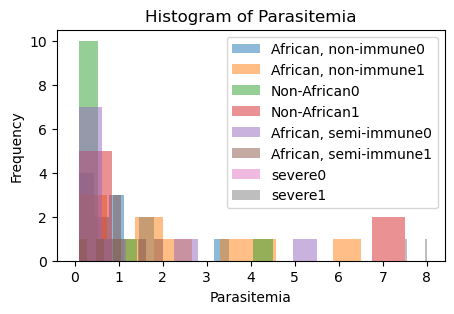

In [61]:
fig, ax = plt.subplots(figsize = (5, 3))
for group in groups:
    ic(group)
    ic(len(data["patientnumber"][data["Groups"]==group].unique()))
    for pth in (0,1):
        ic(pth)
        ax.hist(data[(data["Groups"]==group) & (data["PTH"]==pth)]['parasitemia'], bins=10, alpha=0.5, label=group+str(pth))
        ic(len(data["patientnumber"][(data["Groups"]==group) & (data["PTH"]==pth)].unique()))
        ic(np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['parasitemia']))
        ic(np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['[iE]']))


ax.set_xlabel('Parasitemia')
ax.set_ylabel('Frequency')      
ax.set_title('Histogram of Parasitemia')
ax.legend()
plt.show()  

ic| group: 'African, non-immune'
ic| pth: 0
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['Symptombeginn']): 4.0
ic| pth: 1
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['Symptombeginn']): 4.0
ic| group: 'Non-African'
ic| pth: 0
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['Symptombeginn']): 2.0
ic| pth: 1
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['Symptombeginn']): 5.0
ic| group: 'African, semi-immune'
ic| pth: 0
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['Symptombeginn']): 4.0
ic| pth: 1
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['Symptombeginn']): 5.0
ic| group: 'severe'
ic| pth: 0
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['Symptombeginn']): nan
ic| pth: 1
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['Symptombeginn']): 7.0


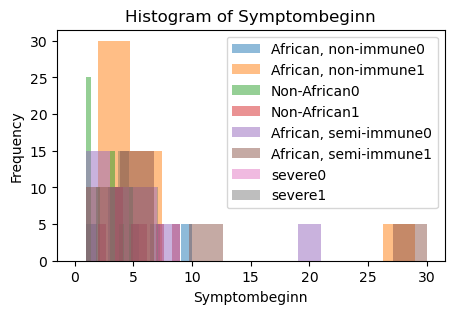

In [62]:
fig, ax = plt.subplots(figsize = (5, 3))
for group in groups:
    ic(group)
    #ic(len(data["patientnumber"][data["Groups"]==group].unique()))
    for pth in (0,1):
        ic(pth)
        ax.hist(data[(data["Groups"]==group) & (data["PTH"]==pth)]['Symptombeginn'], bins=10, alpha=0.5, label=group+str(pth))
        #ic(len(data["patientnumber"][(data["Groups"]==group) & (data["PTH"]==pth)].unique()))
        ic(np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['Symptombeginn']))

ax.set_xlabel('Symptombeginn')
ax.set_ylabel('Frequency')      
ax.set_title('Histogram of Symptombeginn')
ax.legend()
plt.show()  

In [63]:
def extract_patient(data: pd.DataFrame, patient_id: int) -> pd.DataFrame:    
    patient_df = data[data['patient_id'] == patient_id] 
    return patient_df

def list_patients(data: pd.DataFrame) -> list:
    patients = data['patient_id'].unique()
    return patients

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=10)

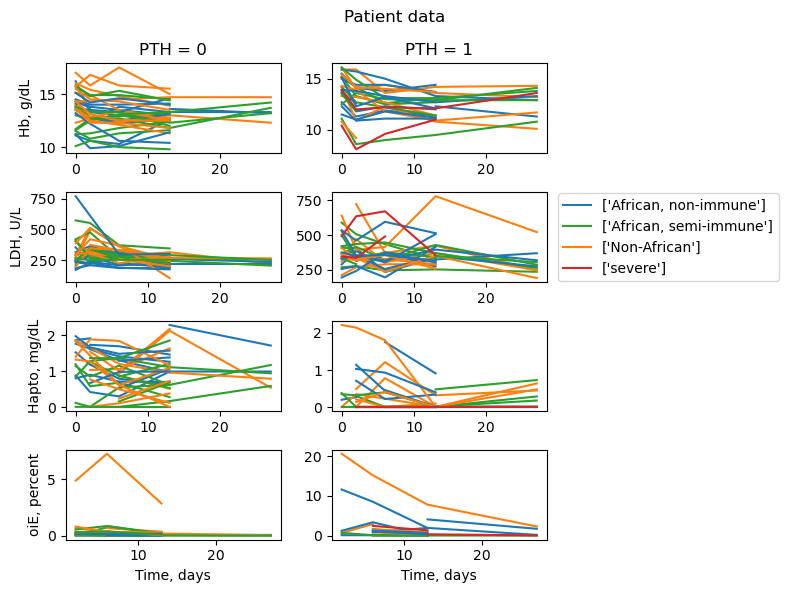

In [64]:
fig, ax = plt.subplots(4, 2, figsize=(8, 6))

for patient in list_patients(data):
    patient_df = extract_patient(data, patient)
    pth = int(patient_df['PTH'].values[0])
    c_int = np.where(groups==patient_df["Groups"].unique())[0][0]

    color = [f'C{i}' for i in range(len(groups))][c_int]
    ax[0, pth].plot(patient_df['time'], patient_df['Hb'], label=patient_df["Groups"].unique(), color=color)
    ax[1, pth].plot(patient_df['time'], patient_df['LDH'], label = patient_df["Groups"].unique(), color=color)
    ax[2, pth].plot(patient_df['time'], patient_df['Hapto'], label = patient_df["Groups"].unique(), color=color)
    ax[3, pth].plot(patient_df['time'], patient_df['oiE_percent'], label = patient_df["Groups"].unique(), color=color)       


ax[3, 0].set_xlabel('Time, days')      
ax[3, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, g/dL')
ax[1, 0].set_ylabel('LDH, U/L')    
ax[2, 0].set_ylabel('Hapto, mg/dL')  
ax[3, 0].set_ylabel('oiE, percent')    

ax[0, 0].set_title('PTH = 0')
ax[0, 1].set_title('PTH = 1')
legend_without_duplicate_labels(ax[1, -1])

fig.suptitle('Patient data')
plt.tight_layout()
plt.show()

In [65]:
def normalize_hb(data: pd.DataFrame):
    data['Hb_norm'] = (data['Hb'] - data['Hb'].mean()) / data['Hb'].std()
    return data

def normalize_ldh(data: pd.DataFrame):
    data['LDH_norm'] = (data['LDH'] - data['LDH'].mean()) / data['LDH'].std()
    return data 

def normalize_hapto(data: pd.DataFrame):
    data['Hapto_norm'] = (data['Hapto'] - data['Hapto'].mean()) / data['Hapto'].std()
    return data 


def normalize_oie(data: pd.DataFrame):
    data['oiE_percent_norm'] = (data['oiE_percent'] - data['oiE_percent'].mean()) / data['oiE_percent'].std()
    return data 

def normalyize_data(data: pd.DataFrame):
    data = normalize_hb(data)
    data = normalize_ldh(data)
    data = normalize_hapto(data)
    data = normalize_oie(data)  
    return data 

In [66]:
n_data = normalyize_data(data)

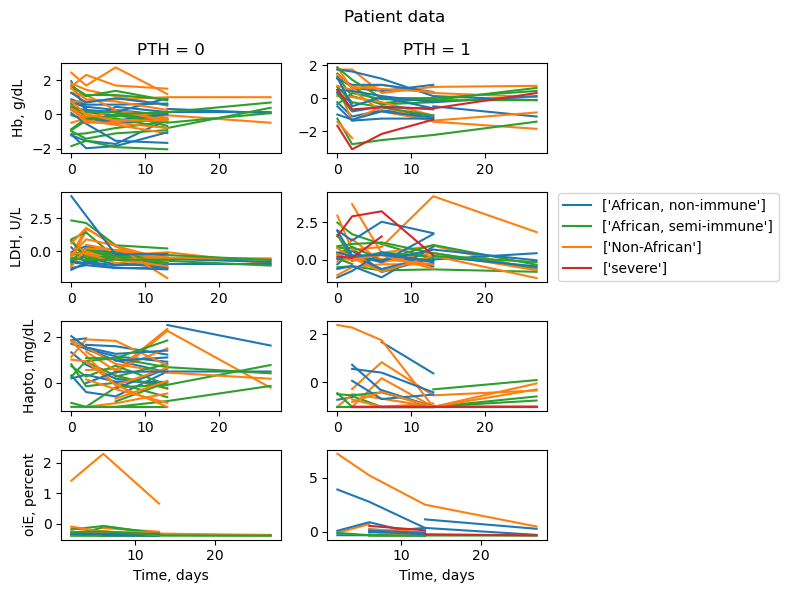

In [67]:
fig, ax = plt.subplots(4, 2, figsize=(8, 6))

for patient in list_patients(n_data):
    patient_df = extract_patient(n_data, patient)
    pth = int(patient_df['PTH'].values[0])
    c_int = np.where(groups==patient_df["Groups"].unique())[0][0]

    color = [f'C{i}' for i in range(len(groups))][c_int]
    ax[0, pth].plot(patient_df['time'], patient_df['Hb_norm'], label=patient_df["Groups"].unique(), color=color)
    ax[1, pth].plot(patient_df['time'], patient_df['LDH_norm'], label = patient_df["Groups"].unique(), color=color)
    ax[2, pth].plot(patient_df['time'], patient_df['Hapto_norm'], label = patient_df["Groups"].unique(), color=color)
    ax[3, pth].plot(patient_df['time'], patient_df['oiE_percent_norm'], label = patient_df["Groups"].unique(), color=color)       


ax[3, 0].set_xlabel('Time, days')      
ax[3, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, g/dL')
ax[1, 0].set_ylabel('LDH, U/L')    
ax[2, 0].set_ylabel('Hapto, mg/dL')  
ax[3, 0].set_ylabel('oiE, percent')    

ax[0, 0].set_title('PTH = 0')
ax[0, 1].set_title('PTH = 1')
legend_without_duplicate_labels(ax[1, -1])

fig.suptitle('Patient data')
plt.tight_layout()
plt.show()

In [68]:
# Define a function to calculate normalized values
def calculate_normalized_feat(patient_data, feature: str):
    mean_feat = patient_data[feature].mean()
    std_feat = patient_data[feature].std()
    normalized_feat = (patient_data[feature] - mean_feat)/std_feat
    return normalized_feat

def normalize_data_ind(data: pd.DataFrame, features: list):
    for feature in features:    
        for patient in list_patients(data):
            patient_df = extract_patient(data, patient)
            data.loc[data['patient_id'] == patient, f'{feature}_norm_ind'] = calculate_normalized_feat(patient_df, feature)
    return data

In [69]:
n_data_ind = normalize_data_ind(n_data, ['Hb', 'LDH', 'Hapto', 'oiE_percent'])

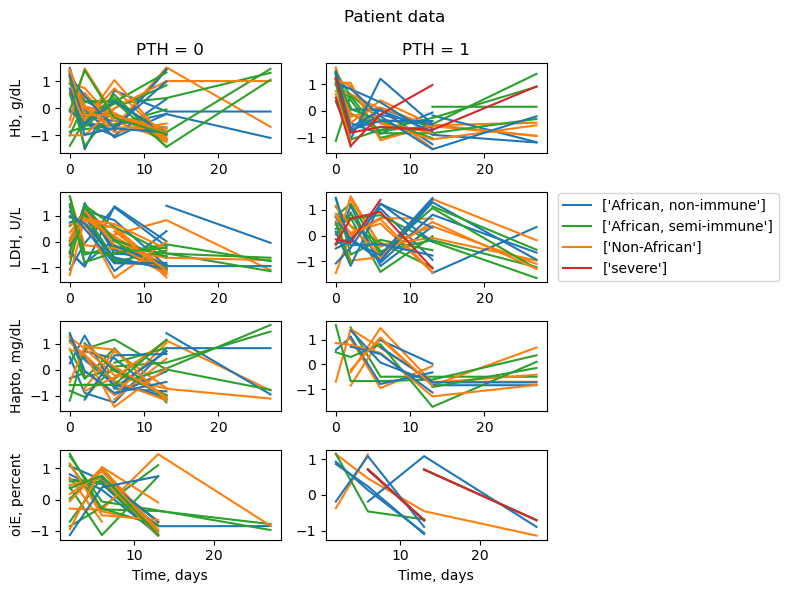

In [70]:
fig, ax = plt.subplots(4, 2, figsize=(8, 6))

for patient in list_patients(n_data_ind):
    patient_df = extract_patient(n_data_ind, patient)
    pth = int(patient_df['PTH'].values[0])
    c_int = np.where(groups==patient_df["Groups"].unique())[0][0]

    color = [f'C{i}' for i in range(len(groups))][c_int]
    ax[0, pth].plot(patient_df['time'], patient_df['Hb_norm_ind'], label=patient_df["Groups"].unique(), color=color)
    ax[1, pth].plot(patient_df['time'], patient_df['LDH_norm_ind'], label = patient_df["Groups"].unique(), color=color)
    ax[2, pth].plot(patient_df['time'], patient_df['Hapto_norm_ind'], label = patient_df["Groups"].unique(), color=color)
    ax[3, pth].plot(patient_df['time'], patient_df['oiE_percent_norm_ind'], label = patient_df["Groups"].unique(), color=color)       


ax[3, 0].set_xlabel('Time, days')      
ax[3, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, g/dL')
ax[1, 0].set_ylabel('LDH, U/L')    
ax[2, 0].set_ylabel('Hapto, mg/dL')  
ax[3, 0].set_ylabel('oiE, percent')    

ax[0, 0].set_title('PTH = 0')
ax[0, 1].set_title('PTH = 1')
legend_without_duplicate_labels(ax[1, -1])

fig.suptitle('Patient data')
plt.tight_layout()
plt.show()

In [71]:
# Define a function to calculate normalized Hb values
def calculate_minmax_feat(patient_data, feature: str):
    max_feat = patient_data[feature].max()
    min_feat = patient_data[feature].min()
    normalized_feat = (patient_data[feature] - min_feat)/(max_feat-min_feat)
    return normalized_feat

def normalize_data_minmax_ind(data: pd.DataFrame, features: list):
    for feature in features:    
        for patient in list_patients(data):
            patient_df = extract_patient(data, patient)
            data.loc[data['patient_id'] == patient, f'{feature}_minmax_ind'] = calculate_minmax_feat(patient_df, feature        )
    return data

In [72]:
n_data = normalize_data_minmax_ind(n_data, ['Hb', 'LDH', 'Hapto', 'oiE_percent'])   

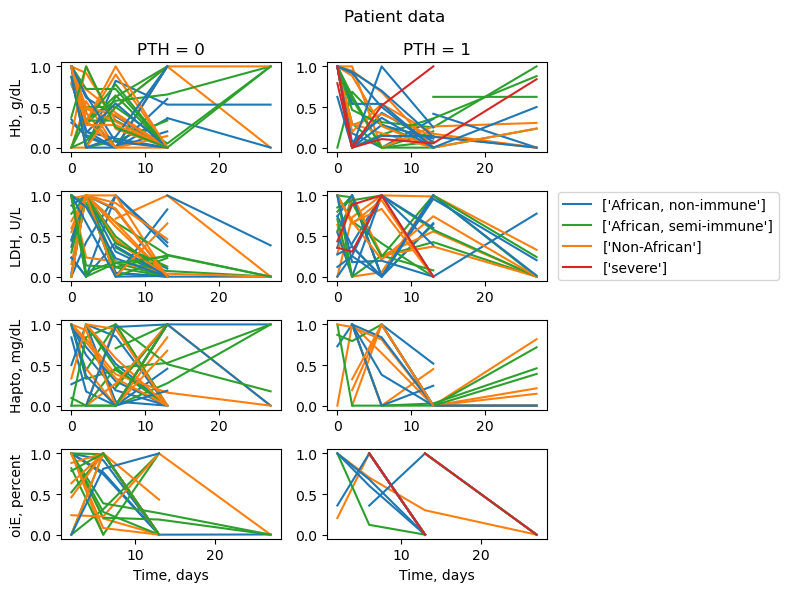

In [73]:
fig, ax = plt.subplots(4, 2, figsize=(8, 6))

for patient in list_patients(n_data):
    patient_df = extract_patient(n_data, patient)
    pth = int(patient_df['PTH'].values[0])
    c_int = np.where(groups==patient_df["Groups"].unique())[0][0]

    color = [f'C{i}' for i in range(len(groups))][c_int]
    ax[0, pth].plot(patient_df['time'], patient_df['Hb_minmax_ind'], label=patient_df["Groups"].unique(), color=color)
    ax[1, pth].plot(patient_df['time'], patient_df['LDH_minmax_ind'], label = patient_df["Groups"].unique(), color=color)
    ax[2, pth].plot(patient_df['time'], patient_df['Hapto_minmax_ind'], label = patient_df["Groups"].unique(), color=color)
    ax[3, pth].plot(patient_df['time'], patient_df['oiE_percent_minmax_ind'], label = patient_df["Groups"].unique(), color=color)       


ax[3, 0].set_xlabel('Time, days')      
ax[3, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, g/dL')
ax[1, 0].set_ylabel('LDH, U/L')    
ax[2, 0].set_ylabel('Hapto, mg/dL')  
ax[3, 0].set_ylabel('oiE, percent')    

ax[0, 0].set_title('PTH = 0')
ax[0, 1].set_title('PTH = 1')
legend_without_duplicate_labels(ax[1, -1])

fig.suptitle('Patient data')
plt.tight_layout()
plt.show()

In [74]:
def get_stats_of_feature(data: pd.DataFrame, feature: str, group: str, pth: int=0):
    pth_data = data[(data["Groups"]==group)&(data['PTH'] == pth)]

    feature_array = pth_data[feature].values
    f_reshaped = feature_array.reshape(len(feature_array)//5 , 5)

    mean_feature = np.nanmean(f_reshaped, axis=0)
    median_feature = np.nanmedian(f_reshaped, axis=0)  
    std_feature = np.nanstd(f_reshaped, axis=0)

    percentile_25, percentile_75 = np.nanpercentile(f_reshaped, [25, 75], axis=0)


    return mean_feature, median_feature,percentile_25, percentile_75 #std_feature,   

In [75]:
feature_list = ['Hb', 'LDH', 'Hapto', '[oiE]', 'RPI', '[E]', '[iE]', '[R]', 'Hkt']    

In [76]:
feature_stats = {g+"_"+str(i):{} for g in groups[:-1] for i in (0,1)}
for i,feature in enumerate(feature_list):
    for group in groups[:-1]:
        for pth in (0,1):
            feature_stats[group+"_"+str(pth)][feature] = get_stats_of_feature(n_data, feature, group, pth)

/tmp/ipykernel_8104/3324285091.py:7: RuntimeWarning: Mean of empty slice
  mean_feature = np.nanmean(f_reshaped, axis=0)
/tmp/ipykernel_8104/3324285091.py:8: RuntimeWarning: All-NaN slice encountered
  median_feature = np.nanmedian(f_reshaped, axis=0)
/home/nexia/miniconda3/envs/phd/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/nexia/miniconda3/envs/phd/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


In [77]:
groups =['Non-African','African, non-immune','African, semi-immune', 'severe']

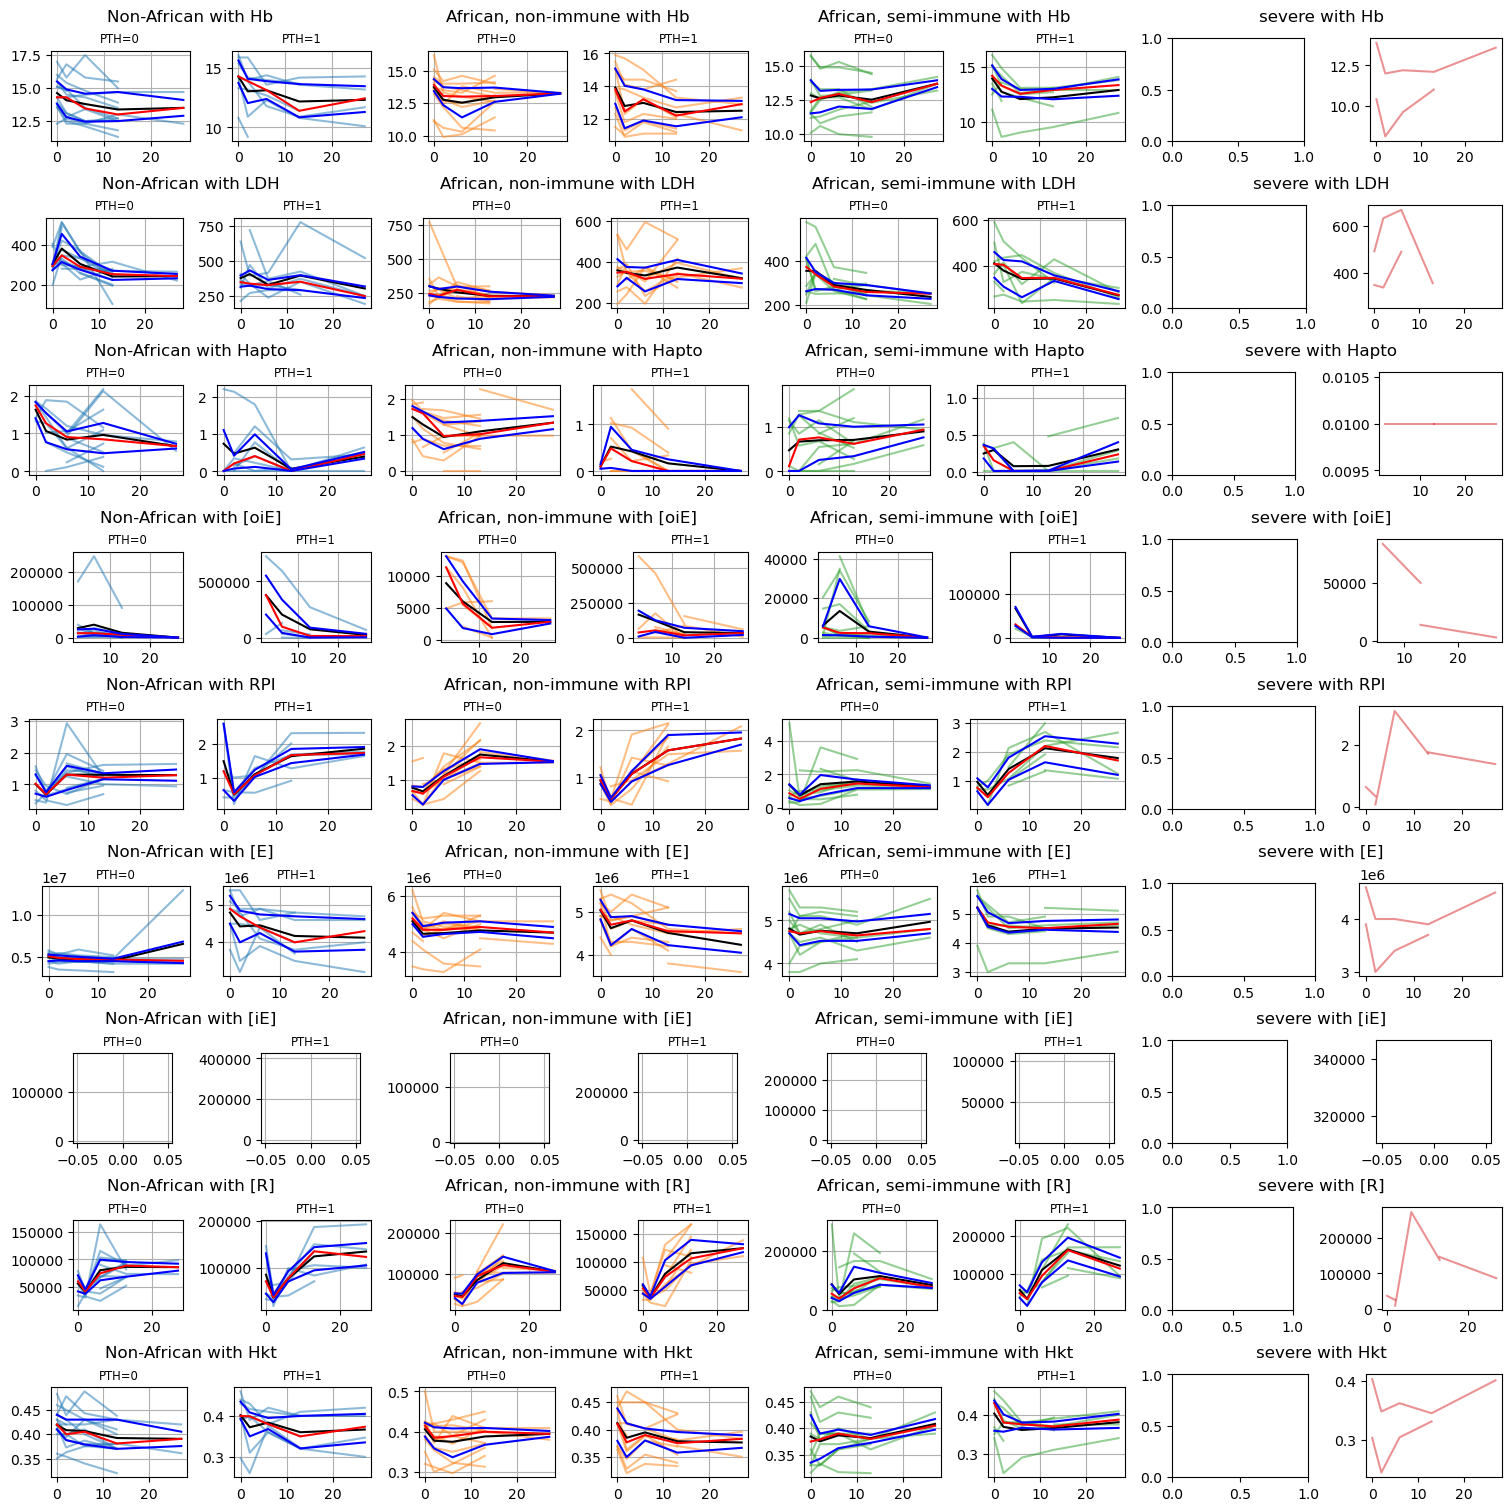

In [78]:
fig = plt.figure(constrained_layout=True, figsize=(15,15))

subfigs = fig.subfigures(len(feature_list), 4)

for outerind, subfig in enumerate(subfigs.flat):
    group = groups[outerind%4]
    
    axs = subfig.subplots(1, 2)
    patients_df = n_data[n_data['Groups']==group]
    if outerind%4 == 0:
        feature = feature_list[int(outerind/4)]
    subfig.suptitle(f'{group} with {feature}')
    
    # Plot patients in the correct group
    for patient in list_patients(patients_df):
        patient_df = extract_patient(n_data, patient)
        pth = int(patient_df['PTH'].values[0])
        c_int = np.where(groups==patient_df["Groups"].unique())[0][0]
        
        color = [f'C{i}' for i in range(len(groups))][c_int]
        axs[pth].plot(patient_df['time'], patient_df[feature], label=patient_df["Groups"].unique(), color=color, alpha=0.5)
    
    # Stats plot for each group
    if 'severe' in group:
        continue
    for innerind, ax in enumerate(axs.flat):
        colors = ["black",'red','blue','blue']
        
        ax.set_prop_cycle(plt.cycler('color', colors))
   
        ax.set_title(f'PTH={innerind}', fontsize='small')
        ax.plot(patient_df['time'],np.array(feature_stats[group+"_"+str(innerind)][feature]).T, label=['mean','median', '25 percentil','75 percentil'] )
        ax.grid()
        #ax.set_xticks()
        #ax.set_yticks([])
    
plt.show()

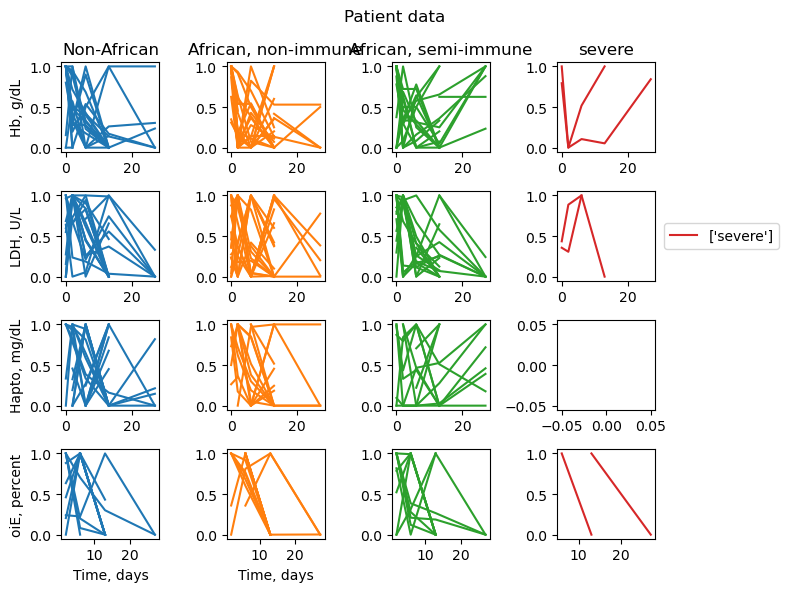

In [79]:
fig, ax = plt.subplots(4, 4, figsize=(8, 6))
for patient in list_patients(n_data):
    patient_df = extract_patient(n_data, patient)
    pth = int(patient_df['PTH'].values[0])
    c_int = np.where(groups==patient_df["Groups"].unique())[0][0]
    
    color = [f'C{i}' for i in range(len(groups))][c_int]
    ax[0, c_int].plot(patient_df['time'], patient_df['Hb_minmax_ind'], label=patient_df["Groups"].unique(), color=color)
    ax[1, c_int].plot(patient_df['time'], patient_df['LDH_minmax_ind'], label = patient_df["Groups"].unique(), color=color)
    ax[2, c_int].plot(patient_df['time'], patient_df['Hapto_minmax_ind'], label = patient_df["Groups"].unique(), color=color)
    ax[3, c_int].plot(patient_df['time'], patient_df['oiE_percent_minmax_ind'], label = patient_df["Groups"].unique(), color=color)       


ax[3, 0].set_xlabel('Time, days')      
ax[3, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, g/dL')
ax[1, 0].set_ylabel('LDH, U/L')    
ax[2, 0].set_ylabel('Hapto, mg/dL')  
ax[3, 0].set_ylabel('oiE, percent')    
for i, group in enumerate(groups):
    ax[0, i].set_title(f'{group}')

legend_without_duplicate_labels(ax[1, -1])

fig.suptitle('Patient data')
plt.tight_layout()
plt.show()